**Prática de Segmentação de imagens**

In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np



1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

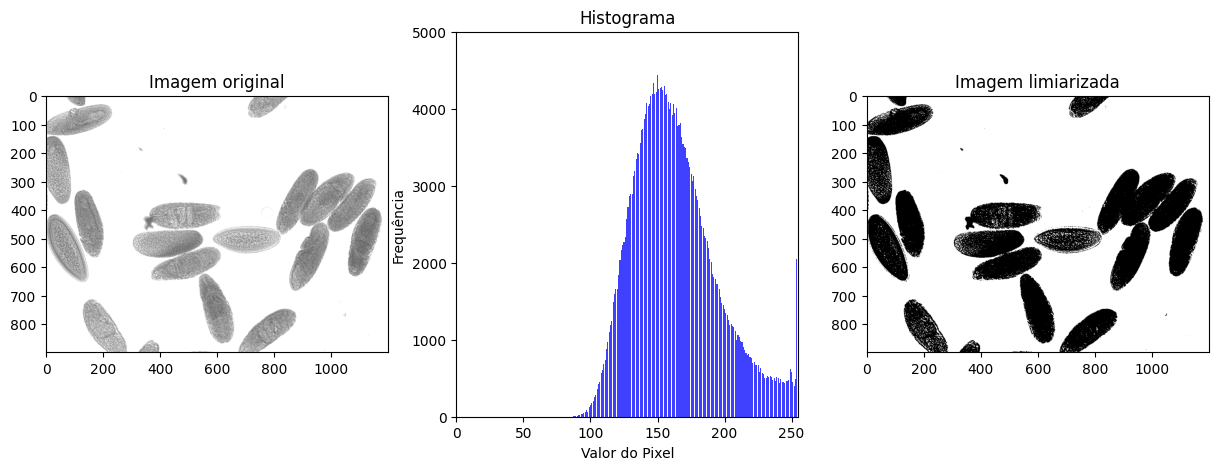

Valor final do T:  204.73979547385494


In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

histog = np.zeros(256)

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        pixel_value = img1[i, j]
        histog[pixel_value] += 1

T = 200
deltaT = T
newT = 0

while(deltaT > 0.5):
    G1 = np.where(img1 < T)
    G2 = np.where(img1 >= T)

    miG1 = np.mean(img1[G1])  
    miG2 = np.mean(img1[G2])
    newT = (miG1 + miG2)/2

    deltaT = newT - T

    T = newT


imgBinarizada = np.where(img1 > T, 1, 0)
normalizada = 255 * (imgBinarizada - imgBinarizada.min())/(imgBinarizada.max() - imgBinarizada.min())


fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1).set_title("Imagem original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2).set_title("Histograma")
plt.bar(range(256), histog, alpha=0.75, color='b', label='Histograma')
plt.axis( [0, 255, 0, 5000] )
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.title('Histograma')


plt.subplot(1, 3, 3).set_title("Imagem limiarizada")
plt.imshow(normalizada, cmap='gray', vmin=0, vmax= 255)
plt.show()

print("Valor final do T: ", T)

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

C:\Users\lazar\AppData\Local\Temp\ipykernel_18516\3187136264.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1).set_title("Imagem original: ")


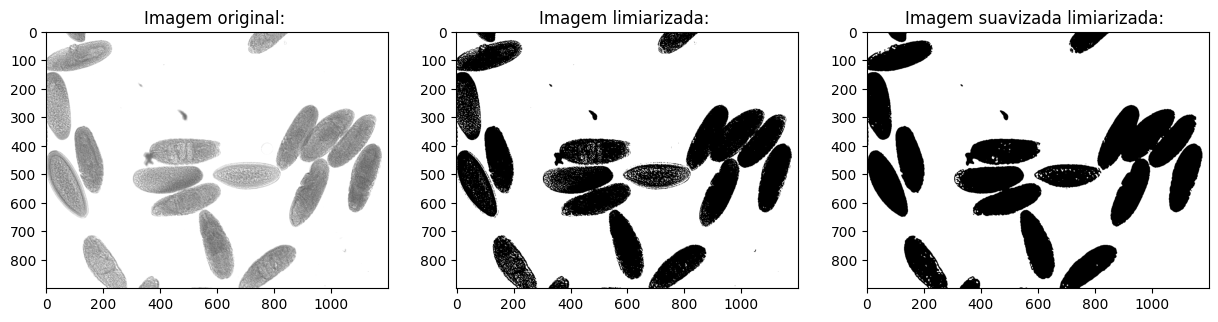

In [20]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

#com suavização prévia (filtro de media)
mascMedia = np.ones((5, 5))/25

imgSuavizada = cv2.filter2D(img1, cv2.CV_64F, mascMedia)

T_inicial = 160
deltaT = T_inicial
while(deltaT > 0.5):

    G1 = np.where(img1 <= T_inicial)
    G2 = np.where(img1 > T_inicial)

    miG1 = np.mean(img1[G1])  
    miG2 = np.mean(img1[G2])

    newT = (miG1 + miG2) // 2
    deltaT = newT - T_inicial
    T_inicial = newT
    
imgSuavizadaLimiariazada = np.where(imgSuavizada > T_inicial, 1, 0)
imgSuavizadaLimiariazada = 255 * (imgSuavizadaLimiariazada - imgSuavizadaLimiariazada.min())//(imgSuavizadaLimiariazada.max() - imgSuavizadaLimiariazada.min())

imgLimiariazada = np.where(img1 > T_inicial, 1, 0)
imgLimiariazada = 255 * (imgLimiariazada - imgLimiariazada.min())/(imgLimiariazada.max() - imgLimiariazada.min())

fig = plt.figure(figsize=(15, 5))
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 1).set_title("Imagem original: ");
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2).set_title("Imagem limiarizada: ")
plt.imshow(imgLimiariazada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3).set_title("Imagem suavizada limiarizada: ")
plt.imshow(imgSuavizadaLimiariazada, cmap='gray', vmin=0, vmax=255)



3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

C:\Users\lazar\AppData\Local\Temp\ipykernel_15408\356590902.py:30: RuntimeWarning: invalid value encountered in scalar divide
  m1 = soma1/P1


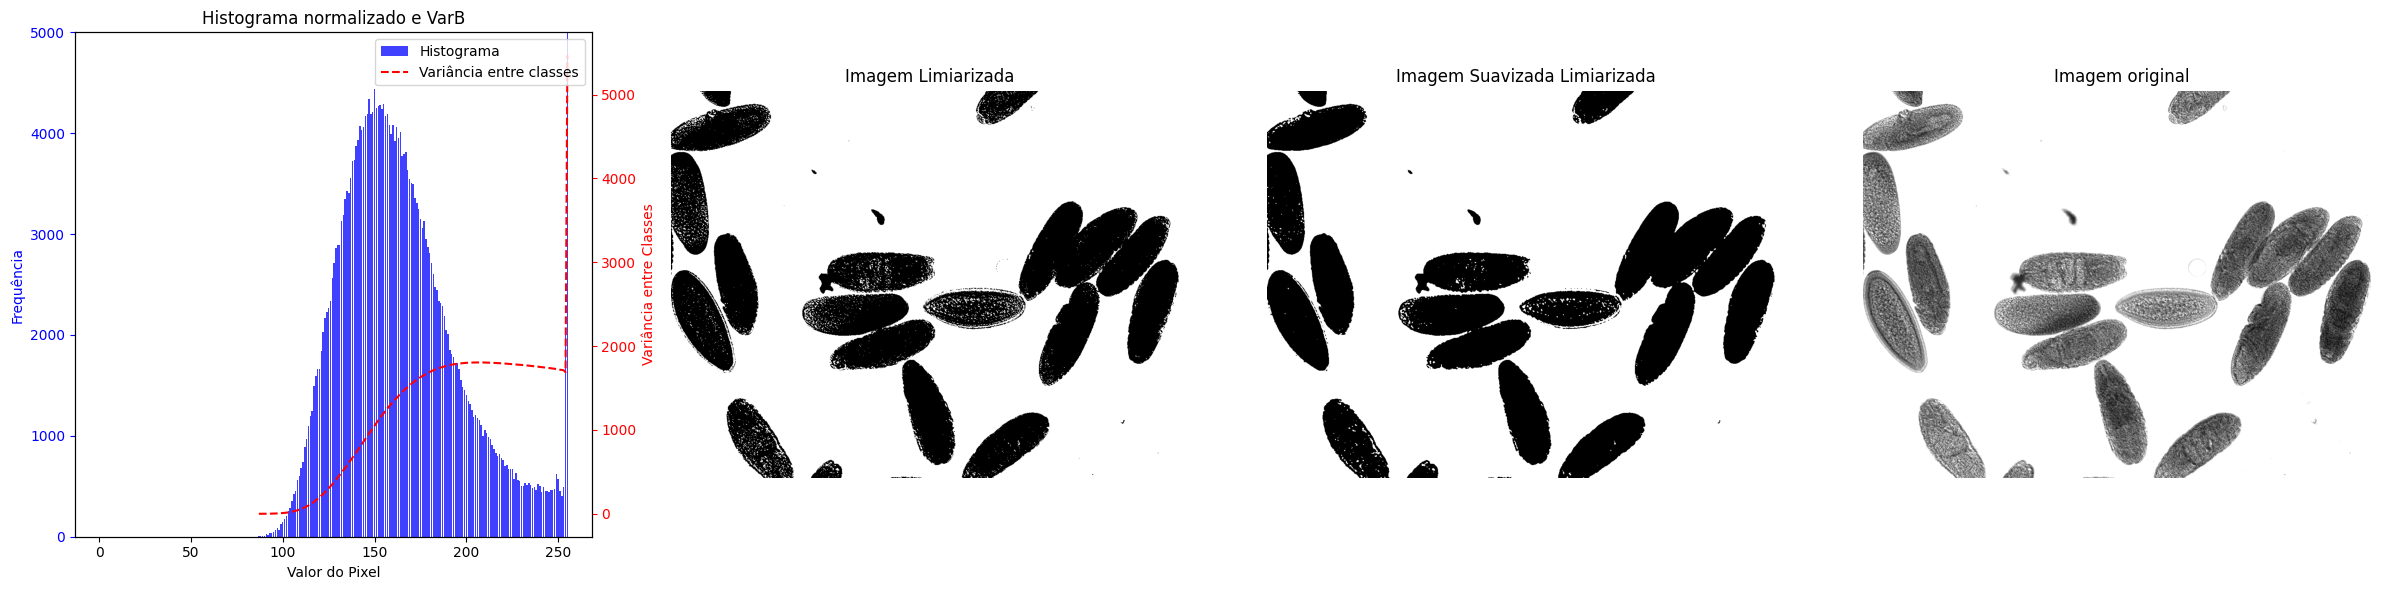

maior valor de eta:  209
eta( 209 ) =  0.9096948133163617


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

histog = np.zeros(256)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        pixel_value = img1[i, j]
        histog[pixel_value] += 1
histogNorma = histog / np.sum(histog)

def eta(k, histograma):
    result = calcVarB_e_VarG(k, histograma)
    varB = result[0]
    varG = result[1]
    return varB/varG

def calcVarB_e_VarG(k, histograma):
    P1 = P2 = 0
    for i in range(k):
        P1 += histograma[i]

    P2 = 1 - P1

    soma1 = 0
    for i in range(k):
        soma1 += i * histograma[i]

    m1 = soma1/P1

    soma2 = 0
    for i in range(k+1, 256):
        soma2 += i * histograma[i]

    m2 = soma2/P2
    
    mG = P1*m1 + P2*m2
    varB = P1 * P2 * (m1 - m2)**2

    varG = 0
    for i in range(256):
        varG += histograma[i] * (i - mG)**2

    return varB, varG

melhorK = 0
temp = 0

for i in range(1, 256):
    valor = eta(i, histogNorma)
    if(temp < valor):
        melhorK = i
        temp = valor

res = calcVarB_e_VarG(melhorK, histogNorma)

newImg = np.where(img1 > melhorK, 1, 0)

newImgNormalized = 255 * (newImg - newImg.min()) / (newImg.max() - newImg.min())

#using Gaussian filter suavization
bluredImg = cv2.GaussianBlur(img1, (5, 5), 1)

newBluredImg = np.where(bluredImg > melhorK, 1, 0)
newBluredImgNomalized = 255 * (newBluredImg - newBluredImg.min())/(newBluredImg.max() - newBluredImg.min())

# Criar subplot para o histograma e duas imagens
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Plotar histograma
axs[0].bar(range(256), histog, alpha=0.75, color='b', label='Histograma')
axs[0].set_xlabel('Valor do Pixel')
axs[0].set_ylabel('Frequência', color='b')
axs[0].tick_params('y', colors='b')
axs[0].set_ylim([0, 5000])

# Criação de um segundo eixo y para varB
ax2 = axs[0].twinx()
ax2.plot(range(1, 256), [calcVarB_e_VarG(i, histogNorma)[0] for i in range(1, 256)], 'r--', label='Variância entre classes')
ax2.set_ylabel('Variância entre Classes', color='r')
ax2.tick_params('y', colors='r')

# Adicionar legenda
lines, labels = axs[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

axs[0].set_title('Histograma normalizado e VarB')

# Adicionar a primeira imagem (newImgNormalized)
axs[1].imshow(newImgNormalized, cmap='gray')
axs[1].set_title('Imagem Limiarizada')
axs[1].axis('off')

# Adicionar a segunda imagem (newBluredImgNormalized)
axs[2].imshow(newBluredImgNomalized, cmap='gray')
axs[2].set_title('Imagem Suavizada Limiarizada')
axs[2].axis('off')

# Adicionar a terceira imagem (substitua 'sua_terceira_imagem.jpg' pelo caminho correto)
axs[3].imshow(img1, cmap='gray')
axs[3].set_title('Imagem original')
axs[3].axis('off')

plt.tight_layout()
plt.show()

print("maior valor de eta: ", melhorK)
print("eta(", melhorK,") = ", eta(melhorK, histogNorma))


In [17]:
4) Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

SyntaxError: invalid syntax (1913560382.py, line 1)

C:\Users\lazar\AppData\Local\Temp\ipykernel_18516\356590902.py:30: RuntimeWarning: invalid value encountered in scalar divide
  m1 = soma1/P1
C:\Users\lazar\AppData\Local\Temp\ipykernel_18516\356590902.py:36: RuntimeWarning: invalid value encountered in scalar divide
  m2 = soma2/P2


K1:  179
K2:  129
K3:  113


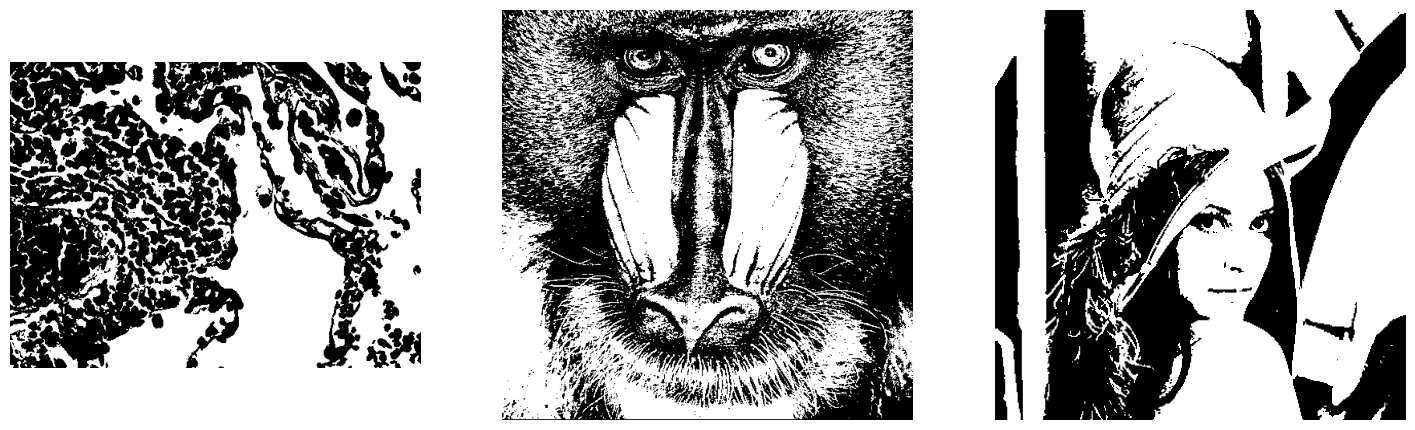

In [14]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)


def calcHistograma(img):
    hist = np.zeros(256)
    for pixel_value in img.flatten():
        hist[pixel_value] += 1
    return hist / np.sum(hist) #retorna o histograma já normalizado(Em termos de probabilidades)

#achando o melhor valor de k
def acharMelhorK(histograma):
    maiorEta = 0
    melhorK = 0
    for i in range(1, 256):
        valor = eta(i, histograma)
        if(maiorEta < valor):
            melhorK = i
            maiorEta = valor
    return melhorK

histog1 = calcHistograma(img1)
histog2 = calcHistograma(img2)
histog3 = calcHistograma(img3)

K1 = acharMelhorK(histog1)
K2 = acharMelhorK(histog2)
K3 = acharMelhorK(histog3)


newImg1 = np.where(img1 > K1, 1, 0)
newImg2 = np.where(img2 > K2, 1, 0)
newImg3 = np.where(img3 > K3, 1, 0)

newImg1 = 255 * (newImg1 - newImg1.min())/(newImg1.max() - newImg   1.min())
newImg2 = 255 * (newImg2 - newImg2.min())/(newImg2.max() - newImg2.min())
newImg3 = 255 * (newImg3 - newImg3.min())/(newImg3.max() - newImg3.min())

#Plotagem dos histogramas das imagens

#fig = plt.figure(figsize=(15, 5))

#plt.subplot(1, 3, 1).set_title("Histograma da imagem 1")
#plt.bar(range(256), histog1, alpha=0.75, color='b', label='Histograma')

#plt.subplot(1, 3, 2).set_title("Histograma da imagem 2")
#plt.bar(range(256), histog2, alpha=0.75, color='b', label='Histograma')

#plt.subplot(1, 3, 3).set_title("Histograma da imagem 3")
#plt.bar(range(256), histog3, alpha=0.75, color='b', label='Histograma')

fig = plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(newImg1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(newImg2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(newImg3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

print("K1: ", K1)
print("K2: ", K2)
print("K3: ", K3)
